In [1]:
import matplotlib.pyplot as plt
import seaborn as sb

In [94]:
import autograd.numpy as np
from autograd import elementwise_grad as egrad

def energy(x):
    #return np.square(x)
    return 5* np.sin(x) - np.sqrt(x*x)



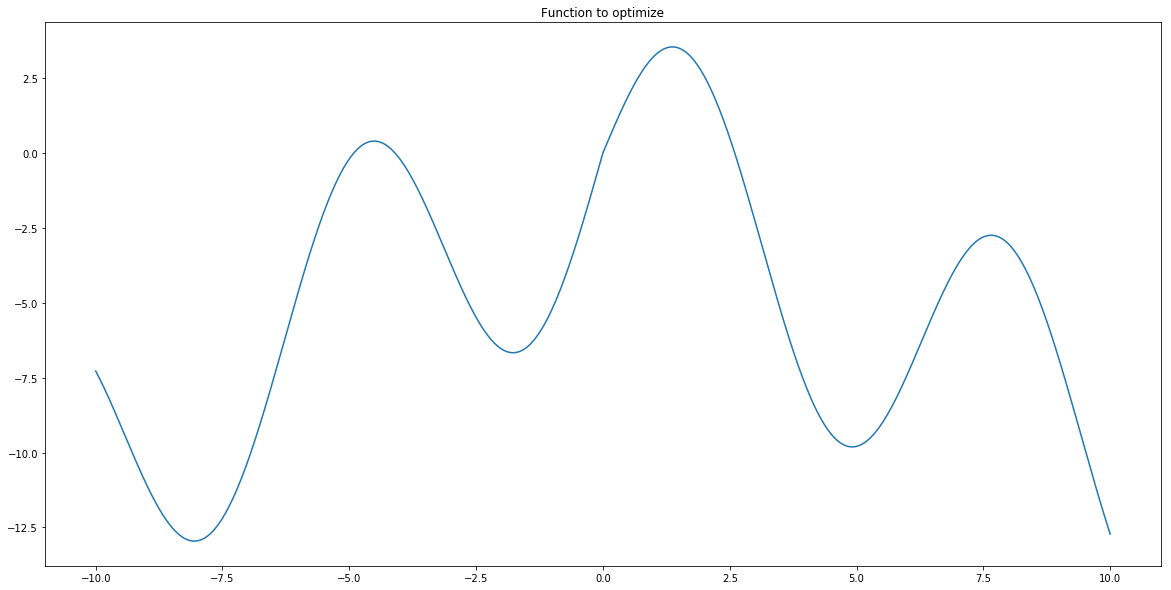

In [95]:
domain = np.linspace(-10, 10, 1000)

plt.figure(figsize=(20, 10))
plt.title("Function to optimize")
sb.lineplot(domain, energy(domain))
plt.show()

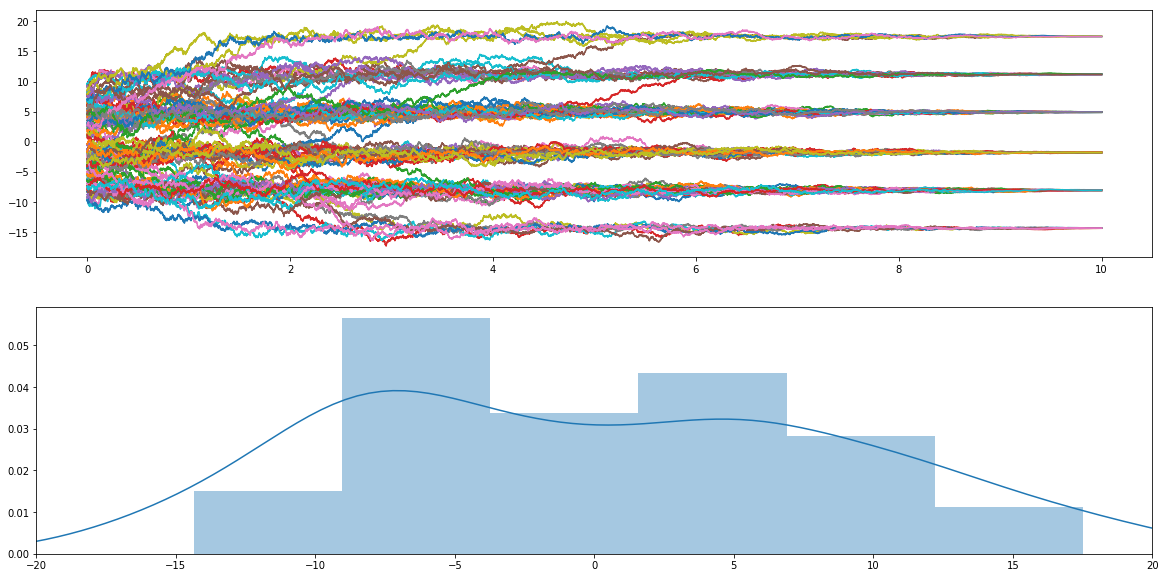

In [99]:
energy_difference = egrad(energy)

def dx(x, dt, diffusion):
    return dt * -energy_difference(x) + dt * diffusion * np.random.normal(0, 1, size=len(x))
    
# To match the domian -0.5 * 20 ensures X \in [-10, 10]
X = (np.random.rand(100) - 0.5) * 20

diffusion = 100

T = 10
dt = 1e-3
t = 0

paths = []
ts = []
while t < T:
    d = diffusion * (1 - t / T)
    ts.append(t)
    paths.append(X)
    X = X + dx(X, dt, d)
    t = t + dt

paths = np.array(paths)

plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
for p in paths.T:
    sb.lineplot(ts, p)

plt.subplot(2, 1, 2)
sb.distplot(paths[-1])
plt.xlim([-20, 20])
    
plt.show()